In [1]:
# Problem Statement
"""
The goal is to classify social media posts as positive, negative, or neutral based on their content.
"""


'\nThe goal is to classify social media posts as positive, negative, or neutral based on their content.\n'

In [2]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyplot
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

import re
import nltk

nltk.download("stopwords")
from nltk.corpus import stopwords




[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\CIRU\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# Data Collection
import pandas as pd
data = pd.read_csv('dataset/data.csv')

#Data Exploration
data.info()
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2215 entries, 0 to 2214
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2215 non-null   int64 
 1   title       2215 non-null   object
 2   text        2215 non-null   object
 3   label       2215 non-null   object
dtypes: int64(1), object(3)
memory usage: 69.3+ KB


,Unnamed: 0
count,2215.000000
mean,5380.637020
std,3054.871228
min,3.000000
25%,2834.500000
50%,5482.000000
75%,7964.000000
max,10557.000000


Text(0.5, 1.0, 'Label Distribution')

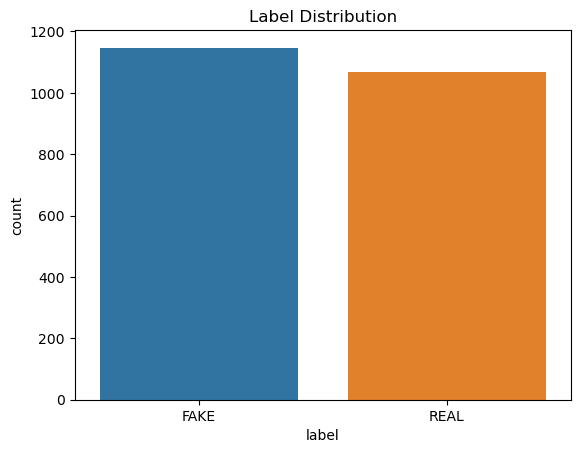

In [4]:
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=data, x='label')
plt.title('Label Distribution')

In [5]:
# Data Preprocessing
data = data.drop_duplicates()
data = data.dropna()

In [6]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\CIRU\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [7]:
def text_transformation(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [8]:
#contraction mapping
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

In [9]:
import re
from bs4 import BeautifulSoup  # Import BeautifulSoup
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

def text_cleaner(text):
    newString = text.lower()
    newString = BeautifulSoup(newString, "lxml").text
    newString = re.sub(r'\([^)]*\)', '', newString)
    newString = re.sub('"','', newString)
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])    
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString) 
    newString = re.sub('[m]{2,}', 'mm', newString)
    return newString
data['cleaned'] = data["text"].apply(text_cleaner)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\CIRU\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\CIRU\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [10]:
data.tail()

,Unnamed: 0,title,text,label,cleaned
2210,2942,Syria's Assad says he receives info about US-l...,Syrian President Bashar Assad says that his go...,REAL,syrian president bashar assad says that his go...
2211,5475,U.S. calls for special Intermediate-range Nucl...,"Thu, 27 Oct 2016 15:29 UTC The United States h...",FAKE,thu oct utc the united states h...
2212,1431,Democratic town hall: Will Clinton pitch backf...,Frida Ghitis is a world affairs columnist for ...,REAL,frida ghitis is a world affairs columnist for ...
2213,2259,Opponents divided on how â€” or whether â€” to...,"When Friday began, there were 14 states where ...",REAL,when friday began there were states where ...
2214,4091,Planned Parenthood fallout: Why it's unfair to...,Some of the rhetoric on the left about the awf...,REAL,some of the rhetoric on the left about the awf...


In [11]:
#Count Vectorizer
x = data['text']
y = data['label']

cv = CountVectorizer()
x = cv.fit_transform(x)

import pickle
pickle.dump(cv, open('transform.pkl', 'wb'))

In [12]:
#data splitting
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=53)

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Ensure you have an array of labels (y) that matches the length of your features (x)
y_train = y_train[:1550] 


In [13]:
#Data Preprocessing and Feature Engineering:
# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.3, random_state=53)
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [14]:
#Model Selection and Evaluation
# Model Selection and Evaluation
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")


Model Accuracy: 0.8556390977443609
Classification Report:
              precision    recall  f1-score   support

        FAKE       0.84      0.89      0.87       352
        REAL       0.87      0.81      0.84       313

    accuracy                           0.86       665
   macro avg       0.86      0.85      0.85       665
weighted avg       0.86      0.86      0.86       665



In [15]:
#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [50, 100, 200]}
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_


In [169]:
# Cross-Validation and Model Validation
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_model, X_train, y_train, cv=5)
mean_cv_score = cv_scores.mean()
print(f"Cross-Validation Mean Score: {mean_cv_score}")


Cross-Validation Mean Score: 0.8612903225806452


In [170]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(x_train, y_train)

MultinomialNB()

In [171]:
clf.score(x_test, y_test)

0.8917293233082707

In [172]:
filename = 'nlp_model.pkl'
pickle.dump(clf, open(filename, 'wb'))